### 消費者評分與折扣多寡的相關性

## 分析目標

##### 折扣的多寡是否會影響消費者評分。

## 簡介
##### 該資料集包含超過一千筆亞馬遜產品的評分、評論、價格等資訊，資料來自亞馬遜官方網站上所列出的詳細資訊。

##### 變數含義：

##### product_id：產品 ID

##### product_name：產品名稱

##### category：產品分類

##### discounted_price：產品的折扣價格

##### actual_price：產品的原價（未折扣前的價格）

##### discount_percentage：產品折扣的百分比

##### rating：消費者評分

##### rating_count：參與評分的消費者數量

##### about_product：產品描述

##### user_id：撰寫評論的消費者 ID

##### user_name：撰寫評論的消費者名稱

##### review_id：評論 ID

##### review_title：簡短的評論標題

##### review_content：評論內容

##### img_link：產品圖片連結

##### product_link：產品官網連結

In [6]:
import pandas as pd
import numpy as np

### 讀取資料

#### 檢查數據結構

In [110]:
original_data=pd.read_csv("amazon.csv")
original_data.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


##### 符合每一列一筆觀察值，每一欄為一個變量，數據結構整齊。

#### 評估數據乾淨度

In [12]:
cleaned_data=original_data.copy()
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

##### rating_count存在缺失值。

#####  discounted_price,actual_price,discount_percentage,rating,rating_count的資料型態應為數字。

##### 將discount_percentage分群以方便後續做分析。

In [16]:
cleaned_data["discounted_price"]=cleaned_data["discounted_price"].str.replace("₹","")
cleaned_data["discounted_price"]=cleaned_data["discounted_price"].str.replace(",","")
cleaned_data["discounted_price"]=cleaned_data["discounted_price"].astype(float)

In [17]:
cleaned_data["actual_price"]=cleaned_data["actual_price"].str.replace("₹","")
cleaned_data["actual_price"]=cleaned_data["actual_price"].str.replace(",","")
cleaned_data["actual_price"]=cleaned_data["actual_price"].astype(float)

In [18]:
cleaned_data["discount_percentage"]=cleaned_data["discount_percentage"].str.replace("%","")
cleaned_data["discount_percentage"]=cleaned_data["discount_percentage"].astype(float)
bins = [-1, 0, 20, 50, 100]
labels=['無折扣', '折扣低於20%', '折扣介於20%-50%', '超過50%']
cleaned_data["discount_group"]=pd.cut(cleaned_data["discount_percentage"],bins=bins,labels=labels)

In [19]:
cleaned_data["rating"]=cleaned_data["rating"].str.replace(".","")
cleaned_data["rating"]=cleaned_data["rating"].str.replace("|","")
cleaned_data["rating"]=cleaned_data["rating"].replace('',np.nan)
cleaned_data["rating"]=cleaned_data["rating"].astype(float)
cleaned_data["rating"]=cleaned_data["rating"]/10

In [20]:
cleaned_data["rating_count"]=cleaned_data["rating_count"].str.replace(",","")
cleaned_data[cleaned_data["rating_count"].isnull()]

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link,discount_group
282,B0B94JPY2N,Amazon Brand - Solimo 65W Fast Charging Braide...,Computers&Accessories|Accessories&Peripherals|...,199.0,999.0,80.0,3.0,NaN,USB C to C Cable: This cable has type C connec...,AE7CFHY23VAJT2FI4NZKKP6GS2UQ,Pranav,RUB7U91HVZ30,The cable works but is not 65W as advertised,I have a pd supported car charger and I bought...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Amazon-Brand-Charging-Su...,超過50%
324,B0BQRJ3C47,"REDTECH USB-C to Lightning Cable 3.3FT, [Apple...",Computers&Accessories|Accessories&Peripherals|...,249.0,999.0,75.0,5.0,NaN,💎[The Fastest Charge] - This iPhone USB C cabl...,AGJC5O5H5BBXWUV7WRIEIOOR3TVQ,Abdul Gafur,RQXD5SAMMPC6L,Awesome Product,Quick delivery.Awesome ProductPacking was good...,https://m.media-amazon.com/images/I/31-q0xhaTA...,https://www.amazon.in/REDTECH-Lightning-Certif...,超過50%


In [21]:
cleaned_data["rating_count"]=cleaned_data["rating_count"].fillna(0)
cleaned_data["rating_count"]=cleaned_data["rating_count"].astype(int)
cleaned_data["rating_count"]=cleaned_data["rating_count"].replace("0",cleaned_data["rating_count"].mean())

In [22]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   product_id           1465 non-null   object  
 1   product_name         1465 non-null   object  
 2   category             1465 non-null   object  
 3   discounted_price     1465 non-null   float64 
 4   actual_price         1465 non-null   float64 
 5   discount_percentage  1465 non-null   float64 
 6   rating               1464 non-null   float64 
 7   rating_count         1465 non-null   int64   
 8   about_product        1465 non-null   object  
 9   user_id              1465 non-null   object  
 10  user_name            1465 non-null   object  
 11  review_id            1465 non-null   object  
 12  review_title         1465 non-null   object  
 13  review_content       1465 non-null   object  
 14  img_link             1465 non-null   object  
 15  product_link         

#### 評估重複數據

##### 各個變量中product_id和product_name不應該存在重複。

In [25]:
cleaned_data["product_id"].duplicated().sum()

114

In [26]:
cleaned_data["product_id"].value_counts()

product_id
B07JW9H4J1    3
B085DTN6R2    3
B07XLCFSSN    3
B077Z65HSD    3
B09W5XR9RT    3
             ..
B0BNVBJW2S    1
B09VZBGL1N    1
B01F262EUU    1
B0BBFJLP21    1
B01486F4G6    1
Name: count, Length: 1351, dtype: int64

In [27]:
cleaned_data[cleaned_data["product_id"]=="B07JW9H4J1"]

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link,discount_group
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399.0,1099.0,64.0,4.2,24269,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,超過50%
369,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399.0,1099.0,64.0,4.2,24270,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/I/51UsScvHQN...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,超過50%
614,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399.0,1099.0,64.0,4.2,24269,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,超過50%


In [28]:
cleaned_data[cleaned_data["product_id"]=="B085DTN6R2"]

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link,discount_group
13,B085DTN6R2,Portronics Konnect CL 20W POR-1067 Type-C to 8...,Computers&Accessories|Accessories&Peripherals|...,350.0,899.0,61.0,4.2,2262,[20W PD FAST CHARGING]-It’s supports 20W PD qu...,"AGUAYQHARAKR2VZTRP276KAGETKQ,AFKTST2773VUOKUHE...","Priya,Mansi,Plaban,Vivek,Taufique Ahmed,Pravee...","R1QETDIPRCX4S0,RARQYQ8POOFA9,R952F931MCOR5,R3L...","Works,Nice Product,Fast Charging as original,G...",Definitely isn’t as good as the original cord ...,https://m.media-amazon.com/images/I/31J6qGhAL9...,https://www.amazon.in/Portronics-Konnect-Deliv...,超過50%
454,B085DTN6R2,Portronics Konnect CL 20W POR-1067 Type-C to 8...,Computers&Accessories|Accessories&Peripherals|...,350.0,899.0,61.0,4.2,2263,[20W PD FAST CHARGING]-It’s supports 20W PD qu...,"AGUAYQHARAKR2VZTRP276KAGETKQ,AFKTST2773VUOKUHE...","Priya,Mansi,Plaban,Vivek,Taufique Ahmed,Pravee...","R1QETDIPRCX4S0,RARQYQ8POOFA9,R952F931MCOR5,R3L...","Works,Nice Product,Fast Charging as original,G...",Definitely isn’t as good as the original cord ...,https://m.media-amazon.com/images/I/31J6qGhAL9...,https://www.amazon.in/Portronics-Konnect-Deliv...,超過50%
689,B085DTN6R2,Portronics Konnect CL 20W POR-1067 Type-C to 8...,Computers&Accessories|Accessories&Peripherals|...,350.0,899.0,61.0,4.2,2262,[20W PD FAST CHARGING]-It’s supports 20W PD qu...,"AGUAYQHARAKR2VZTRP276KAGETKQ,AFKTST2773VUOKUHE...","Priya,Mansi,Plaban,Vivek,Taufique Ahmed,Pravee...","R1QETDIPRCX4S0,RARQYQ8POOFA9,R952F931MCOR5,R3L...","Works,Nice Product,Fast Charging as original,G...",Definitely isn’t as good as the original cord ...,https://m.media-amazon.com/images/I/31J6qGhAL9...,https://www.amazon.in/Portronics-Konnect-Deliv...,超過50%


##### product_id和product_name存在重複，每筆數據內容皆相同，因此需做清理。

In [30]:
cleaned_data=cleaned_data.drop_duplicates(subset=["product_id","product_name"])

In [31]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1351 entries, 0 to 1464
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   product_id           1351 non-null   object  
 1   product_name         1351 non-null   object  
 2   category             1351 non-null   object  
 3   discounted_price     1351 non-null   float64 
 4   actual_price         1351 non-null   float64 
 5   discount_percentage  1351 non-null   float64 
 6   rating               1350 non-null   float64 
 7   rating_count         1351 non-null   int64   
 8   about_product        1351 non-null   object  
 9   user_id              1351 non-null   object  
 10  user_name            1351 non-null   object  
 11  review_id            1351 non-null   object  
 12  review_title         1351 non-null   object  
 13  review_content       1351 non-null   object  
 14  img_link             1351 non-null   object  
 15  product_link         1351 

#### 處理無效或錯誤數據

In [33]:
cleaned_data.describe()

,discounted_price,actual_price,discount_percentage,rating,rating_count
count,1351.000000,1351.000000,1351.000000,1350.000000,1351.000000
mean,3304.801754,5691.176625,46.685418,3.949852,17618.373797
std,7173.975455,11218.666235,21.632611,0.781739,42119.882419
min,39.000000,39.000000,0.000000,0.200000,0.000000
25%,349.000000,899.000000,31.000000,3.900000,1094.500000
50%,899.000000,1795.000000,49.000000,4.100000,4736.000000
75%,2174.000000,4575.000000,62.000000,4.300000,15995.000000
max,77990.000000,139900.000000,94.000000,5.000000,426973.000000


##### rating存在缺失值，因為是分析中數據，因此刪除此筆觀察值。

In [35]:
cleaned_data.dropna(subset=["rating"],inplace=True)

In [36]:
cleaned_data.to_csv("amazon_cleaned.csv")

### 探索數據

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette("pastel")
plt.rcParams['font.family'] = 'AppleGothic' 
plt.rcParams['axes.unicode_minus'] = False

##### 分析消費者評分及折扣分佈

/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 25187 (\N{CJK UNIFIED IDEOGRAPH-6263}) missing from font(s) AppleGothic.
  fig.canvas.print_figure(bytes_io, **kw)


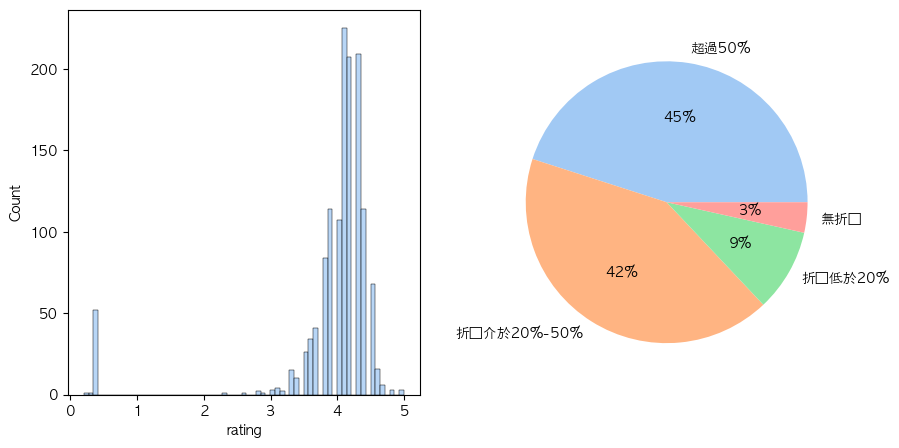

In [114]:
fig,axes=plt.subplots(1,2,figsize=(10,5))
sns.histplot(cleaned_data,x="rating",ax=axes[0])
discount_group_count=cleaned_data["discount_group"].value_counts()
discount_group_labels=discount_group_count.index
axes[1].pie(discount_group_count,labels=discount_group_labels,autopct="%.0f%%")
plt.show()

##### 大部分產品評分介在3~5分之間。
##### 大部分產品折扣超過20%。

#### 消費者評分與折扣多寡的關係

<Axes: xlabel='discount_group', ylabel='rating'>

/opt/anaconda3/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: Glyph 25187 (\N{CJK UNIFIED IDEOGRAPH-6263}) missing from font(s) AppleGothic.
  func(*args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 25187 (\N{CJK UNIFIED IDEOGRAPH-6263}) missing from font(s) AppleGothic.
  fig.canvas.print_figure(bytes_io, **kw)


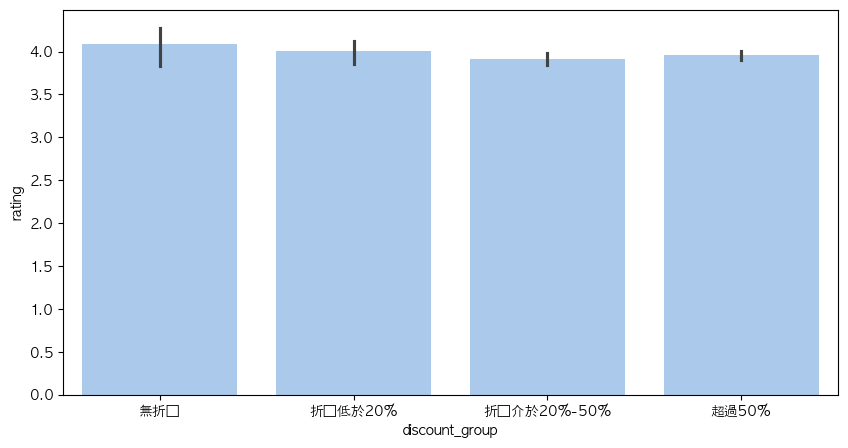

In [43]:
fig,axes=plt.subplots(1,1,figsize=(10,5))
sns.barplot(cleaned_data,x="discount_group",y="rating")

##### 從上述圖表看不出折扣多寡對於消費者評分有明顯差異。

### 分析數據

#### 建立假設

##### 假設樣本服從常態分配，採用單因子變異數分析數據，顯著水準設為0.05。

##### $H_0$:四個折扣區間的消費者評分無顯著差異。
##### $H_1$:四個折扣區間的消費者評分有顯著差異。

In [92]:
import scipy.stats as stats

group_1 = cleaned_data[cleaned_data["discount_group"] == "無折扣"]["rating"]
group_2 = cleaned_data[cleaned_data["discount_group"] == "折扣低於20%"]["rating"]
group_3 = cleaned_data[cleaned_data["discount_group"] == "折扣介於20%-50%"]["rating"]
group_4 = cleaned_data[cleaned_data["discount_group"] == "超過50%"]["rating"]

In [118]:
f_stat, p_value = stats.f_oneway(group_1, group_2, group_3, group_4)
if p_value < 0.05:
    print(f"p值為:{p_value}，小於0.05，因此拒絕原假設，表示四個折扣區間的消費者評分有顯著差異。")
else:
    print(f"p值為:{p_value}，大於0.05，因此接受原假設，表示四個折扣區間的消費者評分無顯著差異。")

p值為:0.384866671734253，大於0.05，因此接受原假設，表示四個折扣區間的消費者評分無顯著差異。


### 結論

##### 消費者評分與折扣的多寡並不存在顯著影響。